Importing required libraries

In [168]:
import numpy as np
import numpy.linalg as LA
import pandas as pd
import matplotlib.pyplot as plt

Reading the csv file and taking the data that corresponds to Andhra Pradesh

In [169]:
df = pd.read_csv('clustering_data.csv', low_memory = False)

df = df.dropna(subset=['Latitude', 'Longitude'])

home_state = 'Andhra Pradesh Circle'

home_state_df = df[df[df.columns[0]] == home_state]
home_state_df

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
...,...,...,...,...,...,...,...,...,...,...,...
151151,Andhra Pradesh Circle,Kurnool Region,Proddatur Division,Simhadripuram S.O,516454,PO,Delivery,Y.S.R.,ANDHRA PRADESH,14.6264444,78.1294722
151152,Andhra Pradesh Circle,Kurnool Region,Proddatur Division,Vaimpalle S.O,516329,PO,Delivery,Y.S.R.,ANDHRA PRADESH,14.3728333,78.4443889
151153,Andhra Pradesh Circle,Kurnool Region,Proddatur Division,Veerapunayanipalle S.O,516321,PO,Delivery,Y.S.R.,ANDHRA PRADESH,14.4720833,78.4716389
153176,Andhra Pradesh Circle,Kurnool Region,Tirupati Division,Nagari S.O,517590,PO,Delivery,CHITTOOR,ANDHRA PRADESH,13.3217778,79.5858333


Converting the columns into numpy arrays and restricting the latitude and longitude to the range of Andhra Pradesh

In [170]:
latitude = home_state_df['Latitude'].to_numpy().astype(float)
longitude = home_state_df['Longitude'].to_numpy().astype(float)

mask = (12 <= latitude) & (latitude <= 21) & (76 <= longitude) & (longitude <= 85)

latitude = latitude[mask]
longitude = longitude[mask]

print(max(latitude))
print(min(latitude))
print(max(longitude))
print(min(longitude))

19.492225
12.546647
84.6945
76.12


Plotting the latitude and longitude points of Andhra Pradesh

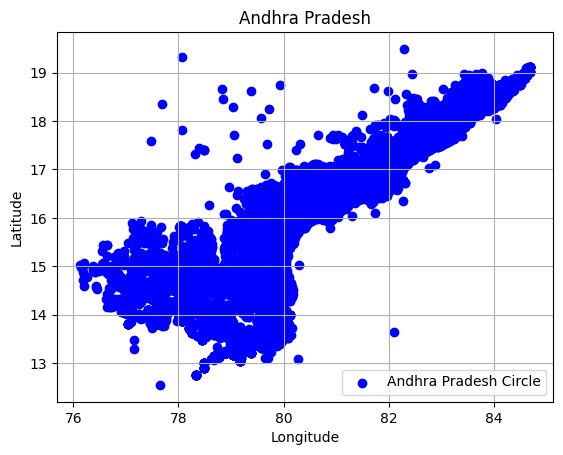

In [171]:
plt.figure()

plt.scatter(longitude, latitude, color = 'blue', label = f'{home_state}')

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Andhra Pradesh')

plt.legend()
plt.grid()
plt.show()

Defining a function for implementing k-means clustering

In [172]:
def kmeans(data, k, max_epochs):
  np.random.seed(42)
  indices = np.random.choice(len(data), k, replace=False)
  centroids = data[indices]

  for epoch in range(max_epochs):
    distances = LA.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    for i in range(k):
      centroids[i] = data[labels == i].mean(axis=0)

  return centroids, labels

Defining a function to calculate WCSS values or inertia for a certain k

In [173]:
def calculate_wcss(data, labels, centroids, k):
  wcss = 0
  for i in range(k):
    condition_cluster = (labels == i)
    cluster_points = data[condition_cluster]

    wcss += np.sum((cluster_points - centroids[i]) ** 2)
  return wcss

Implementing k-means clustering and setting hyperparameters

In [174]:
data = np.column_stack((longitude, latitude))

k = 4
max_epochs = 100

centroids, labels = kmeans(data, k, max_epochs)

Plotting the clustered data for k = 4

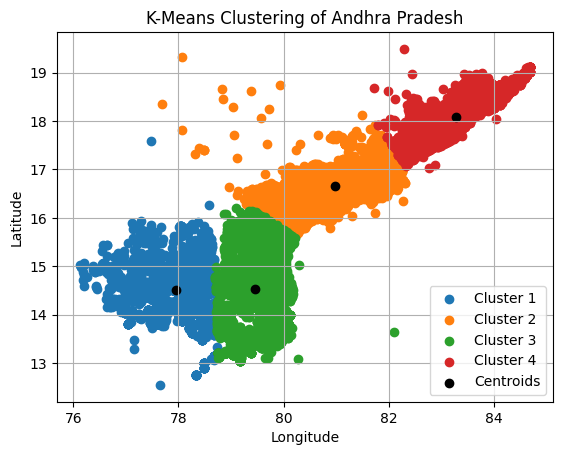

In [175]:
plt.figure()

for i in range(k):
  condition_cluster = (labels == i)
  cluster_points = data[condition_cluster]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='o', label='Centroids')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Andhra Pradesh")

plt.legend()
plt.grid(True)
plt.show()

Find the array of WCSS values for a range of k from 1 to 15

In [176]:
wcss_values = []
k_values = range(1,16)

for k in k_values:
  centroids, labels = kmeans(data, k, max_epochs)
  wcss = calculate_wcss(data, labels, centroids, k)
  wcss_values.append(wcss)

wcss_values = np.array(wcss_values)
print(wcss_values)

[55317.13031667 16231.59578632  9037.5692727   6644.6701654
  4569.53219811  3805.82871168  3338.67163622  2844.56166137
  2650.5987568   2502.23359896  2402.19717645  2326.83739102
  1804.49638074  1693.96323326  1520.37945137]


Plotting the found WCSS values against the k values to see the elbow

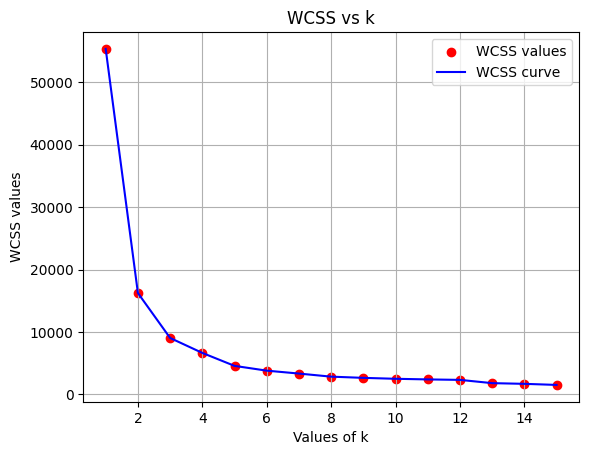

In [177]:
plt.figure()

plt.scatter(k_values, wcss_values, color='red', label='WCSS values')
plt.plot(k_values, wcss_values, color='blue', label='WCSS curve')

plt.xlabel("Values of k")
plt.ylabel("WCSS values")
plt.title("WCSS vs k")

plt.legend()
plt.grid(True)
plt.show()